In [164]:
import numpy as np
import matplotlib.pyplot as plt

Composite Quadrature Rules:

1. Trapezoid Rule (First Order):

\begin{equation}
\int_{x_0}^{x_1} f(x) dx = \frac{h}{2} \left ( f(x_0) +  f(x_1) \right ) + \mathcal{O}(h^3)
\end{equation}

with $h = \frac{x_1 - x_0}{N}$.

2. Simpson's Rule (Second Order):

\begin{equation}
\int_{x_0}^{x_2} f(x) dx = \frac{h}{3} \left ( f(x_0) +  4f(x_1) + f(x_2) \right ) + \mathcal{O}(h^5)
\end{equation}

with $h = \frac{x_2 - x_0}{2N}$.

In [236]:
def yprime(y,t):
    return 2.0*t*y*y

def ydoubleprime(y,t):
    return 2.0*y*y + 4.0*t*y

def yexact(t):
    return 1.0/(1.0 - t*t)

def solve(a,k):
    
    maxN = np.power(10,k)
    print (maxN)
    
    dt = a/maxN
    print (dt)
    
    yl = np.zeros(maxN+1)
    yq = np.zeros(maxN+1)
    ye = np.zeros(maxN+1)
    t = np.zeros(maxN+1)
    
    yl[0] = 1.0
    ye[0] = 1.0
    yq[0] = 1.0
    t[0] = 0.0
    
    for i in range(1,maxN+1):
        t[i] = i*dt
        if i>999990: print(i,t[i])
        yp = yprime(y[i-1],t[i-1])
        ypp = ydoubleprime(y[i-1],t[i-1])

        yl[i] = yl[i-1] + yp*dt
        yq[i] = yq[i-1] + yp*dt + 0.5*ypp*dt*dt
        ye[i] = yexact(t[i])
        if i == maxN: print ('%0.6f %0.5f %0.5f %0.5f %0.3f %0.3f' % (t[i],yl[i],yq[i],ye[i],yp,ypp))
 
    return t,yl,yq,ye

10000
9.999e-05
0.999900 2.00979 2.00999 5000.25001 2.040 6.080


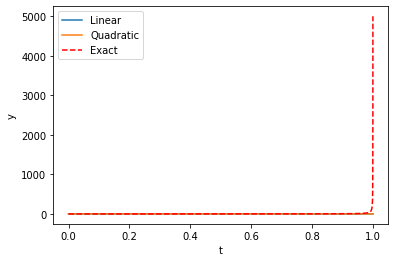

In [240]:
t,yl,yq,ye = solve(0.9999,4)

#plt.yscale('log')
#plt.xscale('log')
plt.xlabel('t')
plt.ylabel('y')
plt.plot(t,yl,label='Linear')
plt.plot(t,yq,label='Quadratic')
plt.plot(t,ye,'r--',label='Exact')
#plt.xlim(0.98,1.00)
plt.legend()

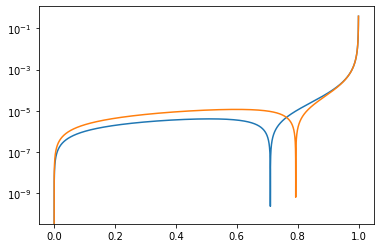

In [169]:
plt.yscale('log')
plt.plot(t,abs(ye-yl)/ye)
plt.plot(t,abs(ye-yq)/ye)